In [1]:
# Importing standard Qiskit libraries
from qiskit import QuantumCircuit, assemble, Aer
from qiskit.visualization import plot_histogram
from qiskit_textbook.widgets import binary_widget
binary_widget(nbits=5)


HTML(value='<pre>Binary   Decimal\n 00000 = 0</pre>')

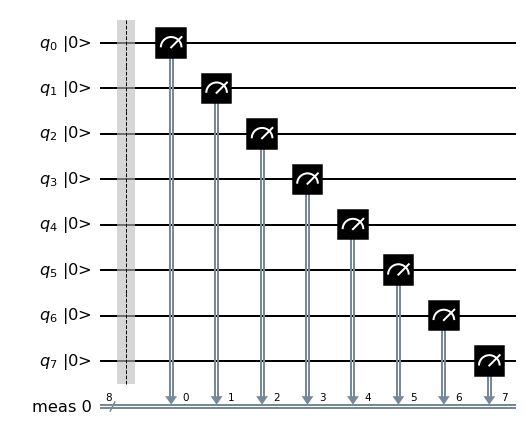

In [2]:
# CIRCUIT 1
qc_output = QuantumCircuit(8)
qc_output.measure_all()
qc_output.draw(initial_state=True)

<frozen importlib._bootstrap>:219: RuntimeWarning: scipy._lib.messagestream.MessageStream size changed, may indicate binary incompatibility. Expected 56 from C header, got 64 from PyObject


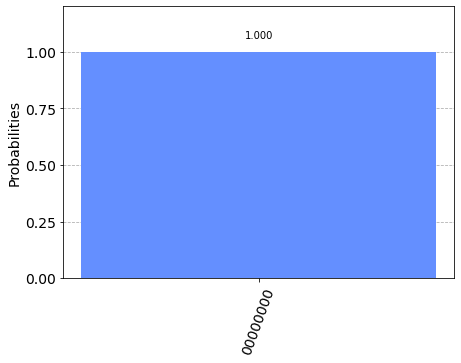

In [3]:
sim = Aer.get_backend('aer_simulator')
result = sim.run(qc_output).result()
counts = result.get_counts()
plot_histogram(counts)

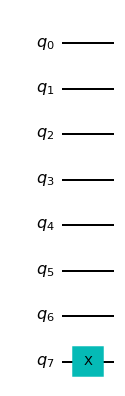

In [4]:
# CIRCUIT 2
qc_encode = QuantumCircuit(8)
qc_encode.x(7)
qc_encode.draw()

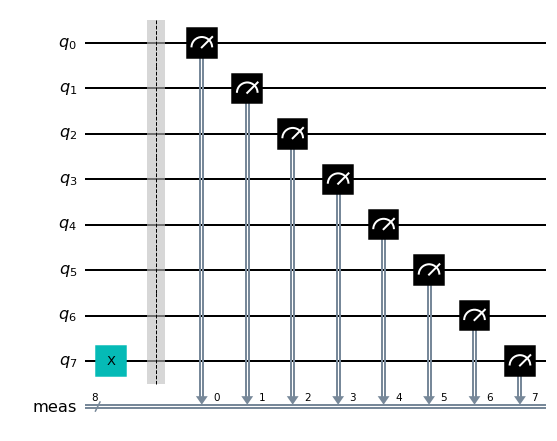

In [5]:
qc_encode.measure_all()
qc_encode.draw()

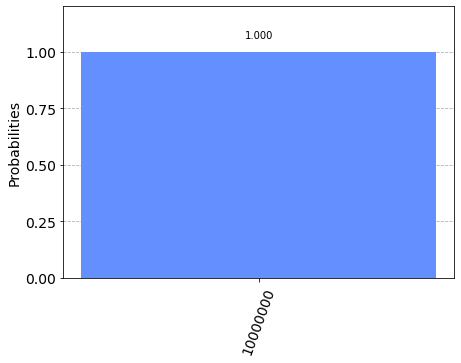

In [6]:
sim = Aer.get_backend('aer_simulator') 
result = sim.run(qc_encode).result()
counts = result.get_counts()
plot_histogram(counts)

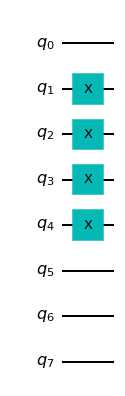

In [7]:
# CIRCUIT 3 (a circuit that prints the age '30' in binary as the result)
qc_encode_age = QuantumCircuit(8)
qc_encode_age.x(1)
qc_encode_age.x(2)
qc_encode_age.x(3)
qc_encode_age.x(4)

qc_encode_age.draw()

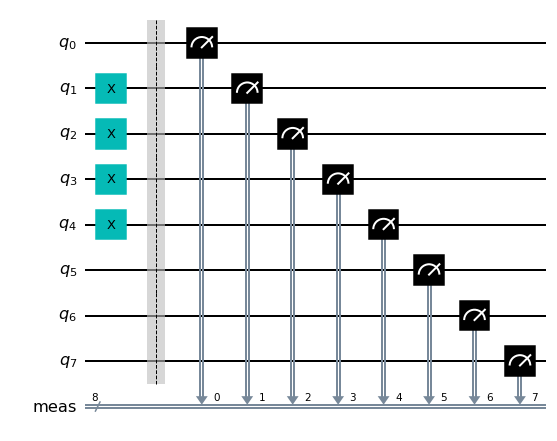

In [8]:
qc_encode_age.measure_all()
qc_encode_age.draw()

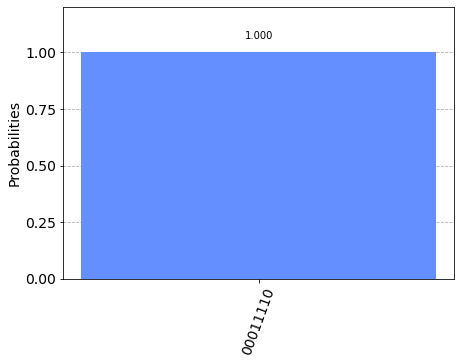

In [9]:
sim = Aer.get_backend('aer_simulator')
result = sim.run(qc_encode_age).result()
counts = result.get_counts()
plot_histogram(counts)

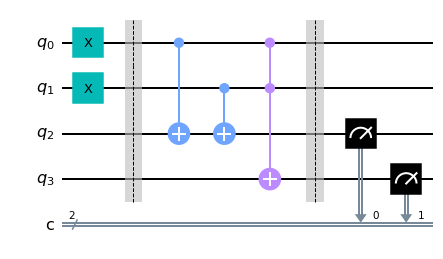

In [10]:
# CIRCUIT 4 (a circuit for binary addition)
qc_adder = QuantumCircuit(4,2)
qc_adder.x(0) # input one
qc_adder.x(1) # input two
qc_adder.barrier()

# Two applications of XOR to the same target (q2), in order to effectively ask:

# 1. Does the input q0 equal 0 (the value of q2)?
qc_adder.cx(0,2)

# 2. If q0 does equal 0, is q1 also 0? If instead q0 equals 1, does q1 also equal 1?
qc_adder.cx(1,2)
# If either of these is true, the target becomes 0.

# check if both qubits equal 1
qc_adder.ccx(0,1,3)
qc_adder.barrier()

qc_adder.measure(2,0) # result of XOR gate
qc_adder.measure(3,1) # result of Toffoli gate

qc_adder.draw()

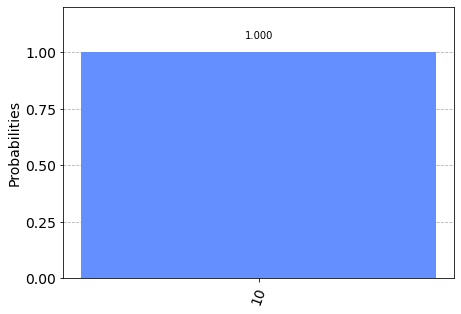

In [11]:
sim = Aer.get_backend('aer_simulator')
result = sim.run(qc_adder).result()
counts = result.get_counts()
plot_histogram(counts)

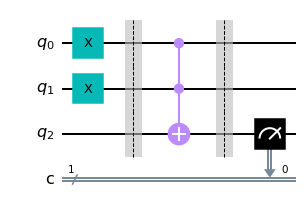

In [12]:
qc_adder = QuantumCircuit(3,1)
qc_adder.x(0)
qc_adder.x(1)
qc_adder.barrier()

qc_adder.ccx(0,1,2)
qc_adder.barrier()

qc_adder.measure(2,0)

qc_adder.draw()